In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Cargar los datos en un DataFrame
df = pd.read_csv('2020_est_salut_publica_tax_espec_fec_mares_15_19a.csv')

#df.head(10)

In [68]:
#print(df['Anys_Periode'].unique())

In [69]:
#df.describe().transpose()

In [70]:
#df.info()

In [71]:
#df.columns

In [72]:
#df['Anys_Periode'].unique()

In [73]:
#barrios = df['Nom_Barri'].unique()

In [74]:
#df.isna().sum()

In [75]:
#df.isnull().sum()

In [76]:
#df.shape

In [77]:
df.dropna(inplace=True)
df.shape

(1022, 6)

In [78]:
df_main_preprocesado = df.drop(['Nom_Districte','Nom_Barri'],axis=1)
#df_main_preprocesado.head(10)

In [79]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
encoder = LabelEncoder()

# Ajustar y transformar la columna "Anys_Periode" en la tabla
df_main_preprocesado['Anys_Periode'] = encoder.fit_transform(df['Anys_Periode'])

# Mostrar la tabla actualizada
print(df_main_preprocesado.tail(10))

      Anys_Periode  Codi_Districte  Codi_Barri  Nombre
1012            13              10          64     3.6
1013            13              10          65     0.7
1014            13              10          66     1.5
1015            13              10          67     0.0
1016            13              10          68     0.9
1017            13              10          69     2.1
1018            13              10          70     9.0
1019            13              10          71     4.4
1020            13              10          72     3.4
1021            13              10          73     5.8


Verificacion de outliers

In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Crear una copia del dataset original
#df_main_outliers = df_main.copy()

df_main_outliers = df_main_preprocesado.copy()
# Seleccionar las columnas numéricas en las que deseas identificar outliers
columnas_numericas = ['Anys_Periode','Codi_Districte', 'Codi_Barri', 'Nombre']

# Aplicar RobustScaler a las columnas numéricas
scaler = RobustScaler()
df_main_outliers[columnas_numericas] = scaler.fit_transform(df_main_preprocesado[columnas_numericas])

# Calcular los límites para identificar los outliers
percentil_25 = np.percentile(df_main_preprocesado[columnas_numericas], 25, axis=0)
percentil_75 = np.percentile(df_main_preprocesado[columnas_numericas], 75, axis=0)
rango_intercuartil = percentil_75 - percentil_25
limite_inferior = percentil_25 - 1.5 * rango_intercuartil
limite_superior = percentil_75 + 1.5 * rango_intercuartil

# Identificar los outliers
outliers = df_main_outliers[
    (df_main_preprocesado[columnas_numericas] < limite_inferior) |
    (df_main_preprocesado[columnas_numericas] > limite_superior)
]

# Imprimir los outliers identificados
print("Outliers identificados:")
print(outliers)
#print(df_main_preprocesado.head(10))


Outliers identificados:
      Anys_Periode  Codi_Districte  Codi_Barri  Nombre
0              NaN             NaN         NaN     NaN
1              NaN             NaN         NaN     NaN
2              NaN             NaN         NaN     NaN
3              NaN             NaN         NaN     NaN
4              NaN             NaN         NaN     NaN
...            ...             ...         ...     ...
1017           NaN             NaN         NaN     NaN
1018           NaN             NaN         NaN     NaN
1019           NaN             NaN         NaN     NaN
1020           NaN             NaN         NaN     NaN
1021           NaN             NaN         NaN     NaN

[1022 rows x 4 columns]


graficamos los puntos y headmap

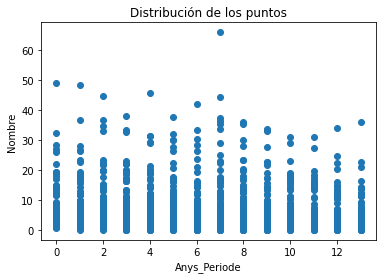

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar los puntos
plt.scatter(df_main_preprocesado['Anys_Periode'], df_main_preprocesado['Nombre'])
plt.xlabel('Anys_Periode')
plt.ylabel('Nombre')
plt.title('Distribución de los puntos')
plt.show()

correlacion

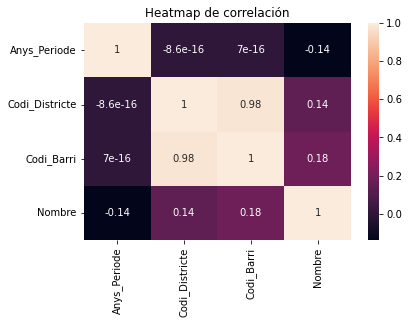

In [82]:
# Generar un heatmap
corr_matrix = df_main_preprocesado.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap de correlación')
plt.show()

Preparamos y ajustamos el modelo 

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Separamos los datos en conjuntos de entrenamiento y prueba
X = df_main_preprocesado.drop(['Nombre'], axis=1)
y = df_main_preprocesado['Nombre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape); print(X_test.shape)

# Crear y entrenar el modelo de Random Forest
model = RandomForestRegressor(max_depth=None, n_estimators=100)
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de entrenamiento y de prueba
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de entrenamiento
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print("R2 score (train):", r2_train)
print("Mean Squared Error (train):", mse_train)
print("Mean Absolute Error (train):", mae_train)

# Evaluar el rendimiento del modelo en el conjunto de prueba
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("R2 score (test):", r2_test)
print("Mean Squared Error (test):", mse_test)
print("Mean Absolute Error (test):", mae_test)


(817, 3)
(205, 3)
R2 score (train): 0.978256774576868
Mean Squared Error (train): 1.5128902619339029
Mean Absolute Error (train): 0.6224308445532434
R2 score (test): 0.872075412709512
Mean Squared Error (test): 8.426263468292685
Mean Absolute Error (test): 1.5856341463414632


Regresion Lineal

Polinomial

Ramdom Forest

Validacion Cruzada

**Prediccion **

Ya sabemos que Random Forest es el modelo que mejor puede predecir nuestros datos ahora vamos utilizar este modelo para obtener los valores

In [84]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df_pred = df_main_preprocesado

# Crear el DataFrame df_result vacío
df_result = pd.DataFrame(columns=['Anys_Periode', 'Codi_Districte', 'Codi_Barri', 'Nombre'])

# Recorrer los distritos y barrios únicos en el dataset
distritos_barrios = df_pred[['Codi_Districte', 'Codi_Barri']].drop_duplicates()
for _, row in distritos_barrios.iterrows():
    codi_districte = row['Codi_Districte']
    codi_barri = row['Codi_Barri']
    
    # Filtrar los datos para el distrito y barrio actual
    df_pred_districte_barri = df_pred[(df_pred['Codi_Districte'] == codi_districte) & (df_pred['Codi_Barri'] == codi_barri)]
    
    # Filtrar los datos para períodos anteriores a '2020-2024'
    df_pred_anteriores = df_pred_districte_barri[df_pred_districte_barri['Anys_Periode'] < 14]
    
    if len(df_pred_anteriores) > 0:
        # Dividir los datos en variables independientes (X_pred) y variable dependiente (y_pred)
        X_pred = df_pred_anteriores[['Anys_Periode', 'Codi_Districte', 'Codi_Barri']]
        y_pred = df_pred_anteriores['Nombre']
        
        # Crear y entrenar el modelo de Random Forest con los mejores parámetros
        model = RandomForestRegressor(max_depth=None, n_estimators=100)
        #model = RandomForestRegressor(max_depth=10, n_estimators=300)
        model.fit(X_pred, y_pred)

        # Importancias de las características
        #importances = model.feature_importances_
        #for i, feature in enumerate(X_pred.columns):
        #    print(f"Feature: {feature}, Importance: {importances[i]}")

        
        # Realizar la predicción para el período '2020-2024'
        X_pred_prediccion = pd.DataFrame({'Anys_Periode': [14], 'Codi_Districte': [codi_districte], 'Codi_Barri': [codi_barri]})
        y_pred_prediccion = model.predict(X_pred_prediccion)
        
        # Agregar los resultados al DataFrame df_result
        df_result = pd.concat([df_result, pd.DataFrame({
            'Anys_Periode': [14],
            'Codi_Districte': codi_districte,
            'Codi_Barri': codi_barri,
            'Nombre': y_pred_prediccion[0]
        })], ignore_index=True)

# Imprimir el DataFrame df_result
print(df_result)

   Anys_Periode Codi_Districte Codi_Barri  Nombre
0            14              1          1  12.047
1            14              1          2   4.081
2            14              1          3  11.739
3            14              1          4   7.825
4            14              2          5   1.817
..          ...            ...        ...     ...
68           14             10         69   2.476
69           14             10         70  10.611
70           14             10         71   4.757
71           14             10         72   3.800
72           14             10         73   5.884

[73 rows x 4 columns]


In [85]:
# Convertir las columnas
df_result['Anys_Periode'] = '2020-2024'

In [86]:
print(df_result) 
df_result.to_csv('df_result.csv', sep=',', index=False)

   Anys_Periode Codi_Districte Codi_Barri  Nombre
0     2020-2024              1          1  12.047
1     2020-2024              1          2   4.081
2     2020-2024              1          3  11.739
3     2020-2024              1          4   7.825
4     2020-2024              2          5   1.817
..          ...            ...        ...     ...
68    2020-2024             10         69   2.476
69    2020-2024             10         70  10.611
70    2020-2024             10         71   4.757
71    2020-2024             10         72   3.800
72    2020-2024             10         73   5.884

[73 rows x 4 columns]


In [87]:
# Unimos df_main y df_result 
df_final = pd.concat([df, df_result], ignore_index=True)

print(df_final)

     Anys_Periode Codi_Districte Nom_Districte Codi_Barri  \
0       2003-2007              1  Ciutat Vella          1   
1       2003-2007              1  Ciutat Vella          2   
2       2003-2007              1  Ciutat Vella          3   
3       2003-2007              1  Ciutat Vella          4   
4       2003-2007              2      Eixample          5   
...           ...            ...           ...        ...   
1090    2020-2024             10           NaN         69   
1091    2020-2024             10           NaN         70   
1092    2020-2024             10           NaN         71   
1093    2020-2024             10           NaN         72   
1094    2020-2024             10           NaN         73   

                                  Nom_Barri  Nombre  
0                                  el Raval  19.400  
1                            el Barri Gòtic  11.600  
2                            la Barceloneta  11.600  
3     Sant Pere, Santa Caterina i la Ribera  14.600

In [88]:
# Obtener los valores únicos de Codi_Districte y Codi_Barri del DataFrame final
codi_districte_unique = df['Codi_Districte'].unique()
codi_barri_unique = df['Codi_Barri'].unique()

# Crear un diccionario para mapear los valores de Codi_Districte y Codi_Barri a Nom_Districte y Nom_Barri
mapping_dist = {}
for codi_districte in codi_districte_unique:
    nom_districte = df.loc[df['Codi_Districte'] == codi_districte, 'Nom_Districte'].iloc[0]
    mapping_dist[codi_districte] = nom_districte
mapping_barri = {}
for codi_barri in codi_barri_unique:
    nom_barri = df.loc[df['Codi_Barri'] == codi_barri, 'Nom_Barri'].iloc[0]
    mapping_barri[codi_barri] = nom_barri
#print (mapping_dist)

In [89]:
# Remplazar los valores de Codi_Districte y Codi_Barri con sus respectivos nombres en el DataFrame final
df_final['Nom_Districte'] = df_final['Codi_Districte'].map(mapping_dist)
df_final['Nom_Barri'] = df_final['Codi_Barri'].map(mapping_barri)

# Mostrar el DataFrame final con los campos Nom_Districte y Nom_Barri llenos
print(df_final)
df_final.to_csv('df_final.csv', sep=',', index=False)

     Anys_Periode Codi_Districte Nom_Districte Codi_Barri  \
0       2003-2007              1  Ciutat Vella          1   
1       2003-2007              1  Ciutat Vella          2   
2       2003-2007              1  Ciutat Vella          3   
3       2003-2007              1  Ciutat Vella          4   
4       2003-2007              2      Eixample          5   
...           ...            ...           ...        ...   
1090    2020-2024             10    Sant Martí         69   
1091    2020-2024             10    Sant Martí         70   
1092    2020-2024             10    Sant Martí         71   
1093    2020-2024             10    Sant Martí         72   
1094    2020-2024             10    Sant Martí         73   

                                         Nom_Barri  Nombre  
0                                         el Raval  19.400  
1                                   el Barri Gòtic  11.600  
2                                   la Barceloneta  11.600  
3            Sant Pere,

**Graficamos un solo barrio**

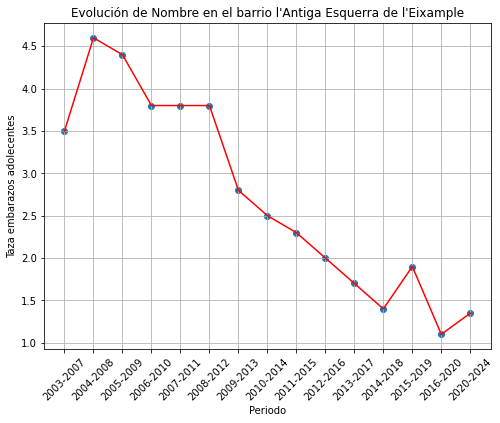

In [92]:
import matplotlib.pyplot as plt

Codi_Barri = 8

nombre_barri = df_final[df_final['Codi_Barri'] == Codi_Barri]['Nom_Barri'].iloc[0]

# Filtrar los datos para el Nom_Barri "La marina del prat vermell"
df_barri = df_final[df_final['Codi_Barri'] == Codi_Barri]

# Filtrar los datos para la evolución de Nombre por año (Anys_Periode)
df_evolucion = df_barri[['Anys_Periode', 'Nombre']]

# Ordenar los datos por Anys_Periode
df_evolucion = df_evolucion.sort_values('Anys_Periode')

# Crear la gráfica de puntos y línea
plt.figure(figsize=(8, 6))
plt.scatter(df_evolucion['Anys_Periode'], df_evolucion['Nombre'])
plt.plot(df_evolucion['Anys_Periode'], df_evolucion['Nombre'], 'r-')
plt.xlabel('Periodo')
plt.ylabel('Taza embarazos adolecentes')
plt.title(f"Evolución de Nombre en el barrio {nombre_barri}")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [91]:
missing_values = df_result[~df_result['Codi_Barri'].isin(df_final['Codi_Barri'])]
print(missing_values)

Empty DataFrame
Columns: [Anys_Periode, Codi_Districte, Codi_Barri, Nombre]
Index: []
